###  Random sample imputation
- Random sample imputation means if data set consist of random values then replace NAN values with random values.
### when should it be used?
- In case of MCAR we use Random sample imputation

In [1]:
import pandas as pd

In [6]:
df=pd.read_csv('Titanic_train.csv',usecols=['Age','Survived','Fare'])

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df['Age'].isnull().sum() # means there are 177 NAN values

177

In [35]:
# here we consider only NAN values(177) 
# replacing NAN values with some random values
# dropna()--some values may replace with NAN as random value if this dropna() is not there
# random_state=0---random values assigned inplace of NAN values, that remains fixed 

df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [34]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [66]:
# replace random values using index into NAN values using index

def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [67]:
median=df['Age'].median()

In [68]:
median

28.0

In [69]:
impute_nan(df,'Age',median)

In [70]:
df.head(10)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,28.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

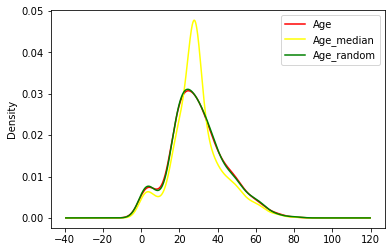

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax,color='red')
df.Age_median.plot(kind='kde', ax=ax, color='yellow')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages
- Easy To implement
- There is less distortion in variance
### Disadvantage
- Every situation randomness wont work

# Capturing NAN values with a new feature
- It works well if the data are missing not completely at random (MNAR)

In [75]:
import numpy as np

In [76]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [78]:
df.head(10)

,Survived,Age,Fare,Age_median,Age_random,Age_NAN
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0
5,0,NaN,8.4583,28.0,28.0,1
6,0,54.0,51.8625,54.0,54.0,0
7,0,2.0,21.0750,2.0,2.0,0
8,1,27.0,11.1333,27.0,27.0,0
9,1,14.0,30.0708,14.0,14.0,0


In [83]:
# Now replace NAN values in AGE feature with median/mean/mode values

df['Age'].fillna(df.Age.median(),inplace=True)

In [84]:
df.head(10)

,Survived,Age,Fare,Age_median,Age_random,Age_NAN
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0
5,0,28.0,8.4583,28.0,28.0,1
6,0,54.0,51.8625,54.0,54.0,0
7,0,2.0,21.0750,2.0,2.0,0
8,1,27.0,11.1333,27.0,27.0,0
9,1,14.0,30.0708,14.0,14.0,0


### Advantages
- Easy to implement
- Captures the importance of missing values
### Disadvantages
- Creating Additional Features(Curse of Dimensionality)

# End of distribution imputation
- indirectly we are removing outliers

In [136]:
df=pd.read_csv('Titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


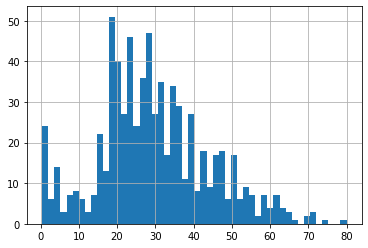

In [137]:
df.Age.hist(bins=50)

# at the extreme right of graph value=(mean+3*SD) is replaced with NAN values 

In [158]:
extreme=df.Age.mean()+3*df.Age.std()

In [159]:
import seaborn as s

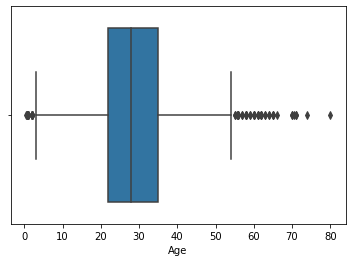

In [160]:
s.boxplot('Age',data=df)
# outlier are there in extreme right

In [147]:
def impute_nan(df,variable,medain,extreme):
    df[variable+'_endofdistribution']=df['Age'].fillna(extreme)
    df[variable].fillna(medain,inplace=True)
    df[variable+'_medain']=df[variable].fillna(medain)

In [148]:
medain=df.Age.median()
medain

28.0

In [149]:
impute_nan(df,'Age',medain,extreme)

In [150]:
df.head(10)

,Survived,Age,Fare,Age_endofdistribution,Age_medain
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,28.0,8.4583,28.0,28.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


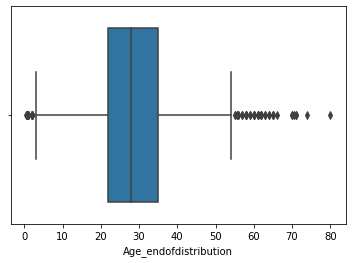

In [151]:
s.boxplot('Age_endofdistribution',data=df)
# outliers are removed 

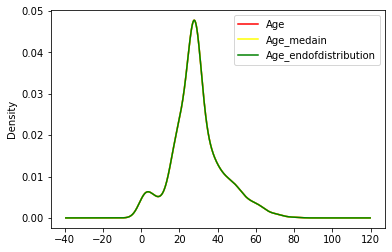

In [157]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax,color='red')
df.Age_medain.plot(kind='kde', ax=ax, color='yellow')
df.Age_endofdistribution.plot(kind='kde', ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages
- Easy to implement
- Captures the importance of missingness if there is 1
### Disadvantages
- Distorts the original distribution of the variable
- If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution
- if the number of NA is big it will mask true outliers in the distribution
- if the number of NA is small, the replaced NA may be considered an outlier and pre-processed 

# Arbitrary imputation
- this technique was implemeted by kaggle competetion
- Replacing NAN value with Arbitrary(random choice/person's whim) value


In [1]:
import pandas as pd
df=pd.read_csv("Titanic_train.csv",usecols=['Survived','Age','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
def impute_nan(df,variable):
    df[variable+'_hundred']=df[variable].fillna(100) #max outlier
    df[variable+'_zeros']=df[variable].fillna(0) # min outlier  

In [3]:
impute_nan(df,'Age')
df.head(10)

,Survived,Age,Fare,Age_hundred,Age_zeros
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,100.0,0.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


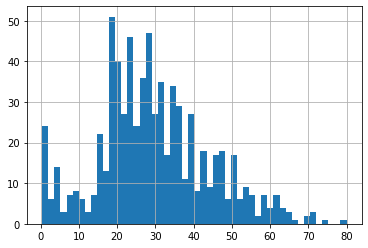

In [4]:
df['Age'].hist(bins=50)

## Advantages
- Easy to implement
- Captures the importance of missingess if there is one
## Disadvantages
- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use